# Análise do covid no Brasil

## Introdução

Esta é uma análise exploratória inicial dos dados do COVID-19 no Brasil.


### Objetivo

O principal objetivo é entender a distribuição da população contaminada por COVID-19 e verificar se fatores como idade, sexo e fatores de risco contribuem para complicação da doença.


### Metodologia

Na primeira parte, é feita uma análise na base e em suas variáveis, entendendo o significado e distribuição delas. E caso necessário, realizamos alguma limpeza/tratamento.

Na segunda parte da análise, criamos algumas hipóteses a respeito dos dados. 

### Resultado Esperado

O resultado sera analisado por meio de graficos, a fim de entendermos as distribuições e suas caracteristicas.
Além disso, podera ser usado um comparativo para ver se as hipóteses possuem significância estatística.


## Base de Dados

Foi utilizado dados abertos disponíveis em [https://opendatasus.saude.gov.br/dataset/bd-srag-2020](https://opendatasus.saude.gov.br/dataset/bd-srag-2020) com a data de 18/05/2020.

Esta base é disponibilizada pelo ***Vigilância de Síndrome Respiratória Aguda Grave (SRAG)***. O SRAG é um programa da Secretaria de Vigilância em Saúde (SVS).

O Dicionário com o significado de cada uma das colunas esta localizado [Aqui](https://opendatasus.saude.gov.br/dataset/9bc2013f-f293-4f3e-94e7-fa76204fc035/resource/20e51b77-b129-4fd5-84f6-e9428ab5e286/download/dicionario_de_dados_srag_hospitalizado_atual-sivepgripe.pdf)

**Um ponto importante** é que os casos que constam nesta base são os casos mais severos e que necessitaram de atendimento médico. Conforme a recomendação do Ministério da Saúde para a população, os casos com sintomas não tão severos recomendava-se a não ir no pronto atendimento. Ou seja, é importante ter em mente que esses dados não representam a real situação da doença no Brasil, e sim uma amostra.

## Análise da Base e das Características

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
pd.options.display.max_columns = None
sns.set(style="whitegrid")

In [127]:
#df_full = pd.read_csv('data/sraghosp_18.05.2020.csv', low_memory=False)
df_full = pd.read_csv('data/SRAG_01-06.csv', sep=';', low_memory=False)

In [128]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217925 entries, 0 to 217924
Columns: 143 entries, NU_NOTIFIC to PAC_DSCBO
dtypes: float64(80), int64(11), object(52)
memory usage: 237.8+ MB


In [129]:
set(df_full2.columns) - set(df_full.columns)

set()

In [130]:
df_full2

,NU_NOTIFIC,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,COD_IDADE,CS_GESTANT,CS_RACA,CS_ETINIA,CS_ESCOL_N,ID_PAIS,CO_PAIS,SG_UF,ID_RG_RESI,CO_RG_RESI,ID_MN_RESI,CO_MUN_RES,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,OUTRO_DES,PUERPERA,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OBES_IMC,OUT_MORBI,MORB_DESC,VACINA,DT_UT_DOSE,MAE_VAC,DT_VAC_MAE,M_AMAMENTA,DT_DOSEUNI,DT_1_DOSE,DT_2_DOSE,ANTIVIRAL,TP_ANTIVIR,OUT_ANTIV,DT_ANTIVIR,HOSPITAL,DT_INTERNA,SG_UF_INTE,ID_RG_INTE,CO_RG_INTE,ID_MN_INTE,CO_MU_INTE,NM_UN_INTE,CO_UN_INTE,UTI,DT_ENTUTI,DT_SAIDUTI,SUPORT_VEN,RAIOX_RES,RAIOX_OUT,DT_RAIOX,AMOSTRA,DT_COLETA,TP_AMOSTRA,OUT_AMOST,REQUI_GAL,IF_RESUL,DT_IF,POS_IF_FLU,TP_FLU_IF,POS_IF_OUT,IF_VSR,IF_PARA1,IF_PARA2,IF_PARA3,IF_ADENO,IF_OUTRO,DS_IF_OUT,LAB_IF,CO_LAB_IF,PCR_RESUL,DT_PCR,POS_PCRFLU,TP_FLU_PCR,PCR_FLUASU,FLUASU_OUT,PCR_FLUBLI,FLUBLI_OUT,POS_PCROUT,PCR_VSR,PCR_PARA1,PCR_PARA2,PCR_PARA3,PCR_PARA4,PCR_ADENO,PCR_METAP,PCR_BOCA,PCR_RINO,PCR_OUTRO,DS_PCR_OUT,LAB_PCR,CO_LAB_PCR,CLASSI_FIN,CLASSI_OUT,CRITERIO,EVOLUCAO,DT_EVOLUCA,DT_ENCERRA,OBSERVA,DT_DIGITA,HISTO_VGM,PAIS_VGM,CO_PS_VGM,LO_PS_VGM,DT_VGM,DT_RT_VGM,PCR_SARS2,PAC_COCBO,PAC_DSCBO
0,315778971760,2020-01-01 00:00:00,1,2019-11-21 00:00:00,47,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030,HOSPITAL SANTA CATARINA,2688603,M,1972-12-10 00:00:00,46,3,3046,6,1.0,NaN,9.0,BRASIL,1,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,MIALGIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,2019-11-23 00:00:00,1.0,2019-11-22 00:00:00,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030.0,HOSPITAL SANTA CATARINA,2688603.0,2.0,NaN,NaN,3.0,9.0,NaN,NaN,1.0,2019-11-22 00:00:00,1.0,NaN,NaN,2.0,2019-11-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FLEURY CENTRO DE PROCEDIMENTOS MEDICOS AVANCAD...,3539822.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,9.0,NaN,2020-01-01 00:00:00,NaN,2020-01-01 00:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,315778983536,2020-01-01 00:00:00,1,2019-11-15 00:00:00,46,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030,HOSPITAL SANTA CATARINA,2688603,M,2019-05-14 00:00:00,6,2,2006,6,9.0,NaN,5.0,BRASIL,1,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030.0,1.0,9.0,9.0,9.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,9.0,NaN,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN,1.0,TRIGEMELA RNPT 32 SEMANAS,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,2019-11-21 00:00:00,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030.0,HOSPITAL SANTA CATARINA,2688603.0,1.0,2019-11-21 00:00:00,NaN,2.0,1.0,NaN,2019-11-21 00:00:00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,3.0,9.0,NaN,2020-01-01 00:00:00,NaN,2020-01-01 00:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,315778997513,2020-01-01 00:00:00,1,2019-11-02 00:00:00,44,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030,HOSPITAL SANTA CATARINA,2688603,M,2019-02-19 00:00:00,9,2,2009,6,9.0,NaN,5.0,BRASIL,1,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030.0,1.0,9.0,9.0,9.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,2019-11-23 00:00:00,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030.0,HOSPITAL SANTA CATARINA,2688603.0,2.0,NaN,NaN,2.0,9.0,NaN,NaN,1.0,2019-11-23 00:00:00,1.0,NaN,NaN,1.0,2019-11-23 00:00:00,2.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,FLEURY CENTRO DE PROCEDIMENTOS MEDICOS AVANCAD...,3539822.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,1.0,NaN,2020-01-01 00:00:00,NaN,2020-01-01 00:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,315779008162

### Removendo um pouco das colunas
A base possui muitas colunas (141), e ao analisar o Dicionário de dados, notei que muitas delas não serão úteis para análise da população do COVID. Vamos ler o documento de Discionário e fazer uma filtragem em alto nível de quais colunas serão retiradas.

In [131]:
cols_to_drop = ['NU_NOTIFIC', 'CS_ETINIA', 'ID_PAIS', 'ID_RG_RESI', 'CO_RG_RESI', 'AVE_SUINO', 'NOSOCOMIAL', 'VACINA', 'DT_UT_DOSE', 'MAE_VAC', 'DT_VAC_MAE', 'M_AMAMENTA', 'DT_DOSEUNI', 'DT_1_DOSE', 'DT_2_DOSE', 'ANTIVIRAL', 'TP_ANTIVIR', 'OUT_ANTIV', 'DT_ANTIVIR', 'RAIOX_RES', 'RAIOX_OUT', 'DT_RAIOX', 'AMOSTRA', 'DT_COLETA', 'TP_AMOSTRA', 'OUT_AMOST', 'REQUI_GAL', 'DT_IF', 'POS_IF_FLU', 'TP_FLU_IF', 'POS_IF_OUT', 'IF_VSR', 'IF_PARA1', 'IF_PARA2', 'IF_PARA3', 'IF_ADENO', 'IF_OUTRO', 'DS_IF_OUT', 'LAB_IF', 'CO_LAB_IF', 'PCR_RESUL', 'DT_PCR', 'TP_FLU_PCR', 'PCR_FLUASU', 'FLUASU_OUT', 'PCR_FLUBLI', 'FLUBLI_OUT', 'POS_PCROUT', 'PCR_VSR', 'PCR_PARA1', 'PCR_PARA2', 'PCR_PARA3', 'PCR_PARA4', 'PCR_ADENO', 'PCR_METAP', 'PCR_BOCA', 'PCR_RINO', 'PCR_OUTRO', 'DS_PCR_OUT', 'CLASSI_OUT', 'HISTO_VGM', 'PAIS_VGM', 'CO_PS_VGM', 'LO_PS_VGM', 'DT_VGM', 'DT_RT_VGM', 'PCR_SARS2', 'PAC_COCBO', 'PAC_DSCBO', 'CO_UN_INTE', 'NM_UN_INTE', 'NU_NOTIFIC', 'OBSERVA',]
df_clean = df_full.drop(cols_to_drop, axis=1)

In [132]:
df_clean.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217925 entries, 0 to 217924
Columns: 71 entries, DT_NOTIFIC to DT_DIGITA
dtypes: float64(40), int64(9), object(22)
memory usage: 118.0+ MB


In [133]:
df_clean.sample(4)

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,COD_IDADE,CS_GESTANT,CS_RACA,CS_ESCOL_N,CO_PAIS,SG_UF,ID_MN_RESI,CO_MUN_RES,CS_ZONA,SURTO_SG,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,OUTRO_DES,PUERPERA,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OBES_IMC,OUT_MORBI,MORB_DESC,HOSPITAL,DT_INTERNA,SG_UF_INTE,ID_RG_INTE,CO_RG_INTE,ID_MN_INTE,CO_MU_INTE,UTI,DT_ENTUTI,DT_SAIDUTI,SUPORT_VEN,IF_RESUL,POS_PCRFLU,LAB_PCR,CO_LAB_PCR,CLASSI_FIN,CRITERIO,EVOLUCAO,DT_EVOLUCA,DT_ENCERRA,DT_DIGITA
175433,2020-05-19 00:00:00,21,2020-05-10 00:00:00,20,PA,05 REGIONAL DE PROTECAO SOCIAL,1488.0,MAE DO RIO,150405,HOSPITAL MUNICIPAL DR SILAS FREITAS,2677407,M,1980-07-20 00:00:00,39,3,3039,6,NaN,NaN,1,PA,MAE DO RIO,150405.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2020-05-19 00:00:00,PA,05 REGIONAL DE PROTECAO SOCIAL,1488.0,MAE DO RIO,150405.0,2.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-22 00:00:00
82715,2020-04-28 00:00:00,18,2020-04-16 00:00:00,16,PE,001,1497.0,RECIFE,261160,REAL HOSPITAL PORTUGUES,1120,F,1980-01-25 00:00:00,40,3,3040,9,9.0,NaN,1,PE,RECIFE,261160.0,1.0,2.0,9.0,1.0,9.0,1.0,9.0,9.0,9.0,9.0,1.0,ANOSMIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2020-04-24 00:00:00,PE,001,1497.0,RECIFE,261160.0,2.0,NaN,NaN,3.0,5.0,NaN,NaN,NaN,5.0,1.0,NaN,NaN,NaN,2020-04-29 00:00:00
12352,2020-03-23 00:00:00,13,2020-03-23 00:00:00,13,RJ,NaN,NaN,RIO DE JANEIRO,330455,SMS HOSPITAL MUNICIPAL RONALDO GAZOLLA AP 33,5717256,M,1976-01-26 00:00:00,44,3,3044,6,1.0,9.0,1,RJ,RIO DE JANEIRO,330455.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,NaN,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,NaN,1.0,CIANOSE,1.0,2020-03-24 00:00:00,NaN,NaN,NaN,NaN,NaN,1.0,2020-03-24 00:00:00,NaN,2.0,5.0,NaN,NaN,NaN,5.0,1.0,2.0,2020-03-27 00:00:00,2020-04-15 00:00:00,2020-03-26 00:00:00
203362,2020-05-26 00:00:00,22,2020-05-24 00:00:00,22,PR,17RS LONDRINA,1371.0,LONDRINA,411370,HOSPITAL EVANGELICO DE LONDRINA,2550792,F,1938-09-16 00:00:00,81,3,3081,5,9.0,9.0,1,PR,LONDRINA,411370.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,NaN,1.0,HAS,1.0,2020-05-24 00:00:00,PR,17RS LONDRINA,1371.0,LONDRINA,411370.0,2.0,NaN,NaN,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-28 00:00:00


In [134]:
df = df_clean

# Mantendo apenas os casos de COVID
df = df[df.CLASSI_FIN==5]

### Entendendo um pouco das características

Ao analisar o Dicionario de dados, notei algumas colunas importantes para análise, então as separei em 5 grupos:
* Sintomas
* Fatores de Risco
* Localização
* Informações Pessoais
* Dados da Internação

In [135]:
sintomas_cols = ['FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'DIARREIA', 'VOMITO', 'OUTRO_DES']
# OUTRO_DES if OUTRO_SIN == 1
df[sintomas_cols].sample(4)

,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_DES
154478,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN
134855,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN
90942,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,NaN
192855,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN


In [136]:
fatores_risco_cols = ['PUERPERA', 'CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE', 'MORB_DESC']
# MORB_DESC if OUT_MORBI == 1
# if OBESIDADE==1 then OBES_IMC is not null
df[fatores_risco_cols].sample(4)

,PUERPERA,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,MORB_DESC
150098,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,HIPOTIREOIDISMO
161457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HAS
205036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,QUADRO NEUROLOGICO CONGENITO
111558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
localizacao_cols = ['SG_UF_NOT', 'ID_MUNICIP', 'ID_UNIDADE', 'CO_PAIS', 'SG_UF', 'ID_MN_RESI', 'CS_ZONA', 'ID_MN_INTE',]
df[localizacao_cols].sample(4)

,SG_UF_NOT,ID_MUNICIP,ID_UNIDADE,CO_PAIS,SG_UF,ID_MN_RESI,CS_ZONA,ID_MN_INTE
34876,BA,SALVADOR,HOSPITAL SANTO ANTONIO,1,BA,SALVADOR,1.0,SALVADOR
212146,AM,MANAUS,HOSPITAL DE CAMPANHA COVID 19 GILBERTO NOVAES,1,AM,IRANDUBA,1.0,MANAUS
116193,MS,RIBAS DO RIO PARDO,HOSPITAL 19 DE MARCO,1,MS,RIBAS DO RIO PARDO,1.0,RIBAS DO RIO PARDO
136032,PE,RECIFE,CENTRO MEDICO HOSPITALAR,1,PE,RECIFE,1.0,NaN


In [138]:
info_p_cols = ['CS_SEXO', 'DT_NASC', 'NU_IDADE_N', 'TP_IDADE', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N']
df[info_p_cols].sample(4)

,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,CS_GESTANT,CS_RACA,CS_ESCOL_N
195376,M,2013-10-22 00:00:00,6,3,6,4.0,0.0
107275,F,1945-12-25 00:00:00,74,3,5,NaN,NaN
97636,M,2012-07-17 00:00:00,7,3,6,9.0,9.0
75089,M,1981-11-19 00:00:00,38,3,6,1.0,9.0


In [139]:
internacao_cols = ['DT_NOTIFIC', 'DT_SIN_PRI', 'DT_INTERNA', 'UTI', 'DT_ENTUTI', 'DT_SAIDUTI', 'SUPORT_VEN', 'IF_RESUL', 'POS_PCRFLU', 'LAB_PCR', 'CO_LAB_PCR', 'CLASSI_FIN', 'CRITERIO', 'EVOLUCAO', 'DT_EVOLUCA', 'DT_ENCERRA', 'DT_DIGITA']
df[internacao_cols].sample(4)

,DT_NOTIFIC,DT_SIN_PRI,DT_INTERNA,UTI,DT_ENTUTI,DT_SAIDUTI,SUPORT_VEN,IF_RESUL,POS_PCRFLU,LAB_PCR,CO_LAB_PCR,CLASSI_FIN,CRITERIO,EVOLUCAO,DT_EVOLUCA,DT_ENCERRA,DT_DIGITA
65100,2020-04-22 00:00:00,2020-04-14 00:00:00,2020-04-20 00:00:00,2.0,NaN,NaN,2.0,NaN,2.0,HOSPITAL ISRAELITA ALBERT EINSTEIN,2058391.0,5.0,1.0,NaN,NaN,NaN,2020-04-22 00:00:00
216219,2020-05-30 00:00:00,2020-05-08 00:00:00,2020-05-08 00:00:00,2.0,NaN,NaN,2.0,5.0,NaN,HC DA FMUSP HOSPITAL DAS CLINICAS SAO PAULO,2078015.0,5.0,1.0,NaN,NaN,NaN,2020-05-31 00:00:00
134397,2020-05-12 00:00:00,2020-05-02 00:00:00,2020-05-12 00:00:00,2.0,NaN,NaN,2.0,5.0,2.0,NaN,NaN,5.0,1.0,1.0,2020-05-17 00:00:00,2020-05-17 00:00:00,2020-05-13 00:00:00
186361,2020-05-25 00:00:00,2020-05-14 00:00:00,2020-05-24 00:00:00,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,5.0,1.0,NaN,NaN,NaN,2020-05-25 00:00:00


## Entendendo as caracteristicas e criando hipóteses

Nesta etapa vamos dar uma olhada melhor nas colunas e bolar algumas hipóteses, afim de alcançar o objetivo desta análise.

### Idade

O primeiro fator de risco apontado pelas notícias é a idade.

In [140]:
df.NU_IDADE_N.describe()

count    73649.000000
mean        57.870480
std         18.642894
min          0.000000
25%         44.000000
50%         59.000000
75%         72.000000
max        136.000000
Name: NU_IDADE_N, dtype: float64

(0.0, 110.0)

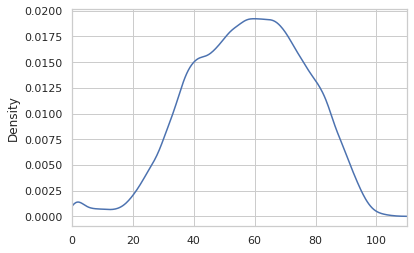

In [141]:
fig, ax = plt.subplots(nrows=1, ncols=1)
df.NU_IDADE_N.plot.kde(ax=ax)
ax.set_xlim(0,110)

In [144]:
#fig, ax = plt.subplots(nrows=1, ncols=1)
#df.(ax=ax)
#ax.set_xlim(0,110)
df.groupby('EVOLUCAO').NU_IDADE_N.describe()

,count,mean,std,min,25%,50%,75%,max
EVOLUCAO,,,,,,,,
1.0,27934.0,51.385587,17.456409,0.0,39.0,51.0,63.0,136.0
2.0,24524.0,67.527524,16.085543,0.0,58.0,69.0,80.0,114.0
9.0,3318.0,53.455093,17.770730,0.0,41.0,53.0,67.0,97.0
